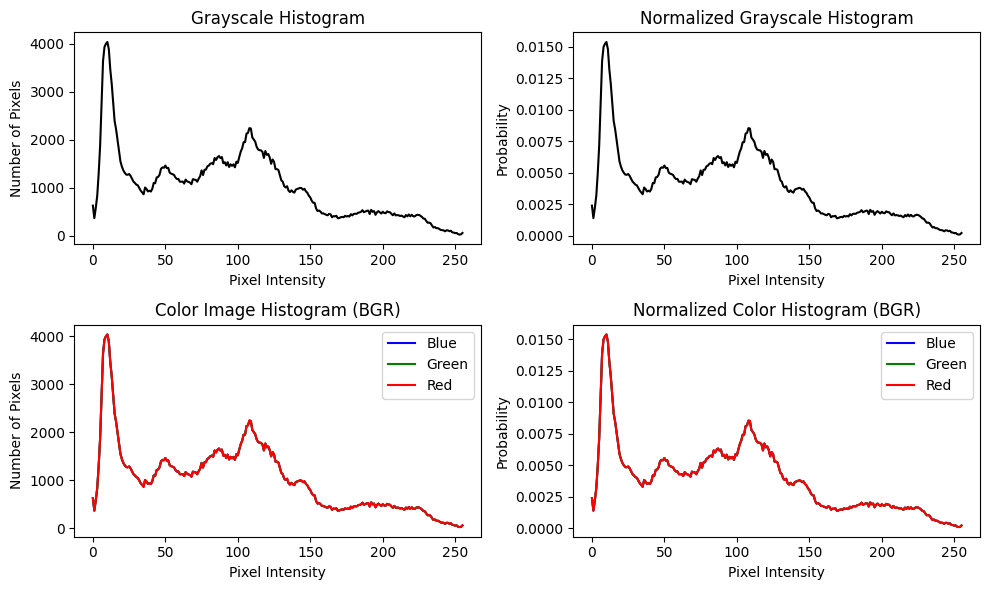

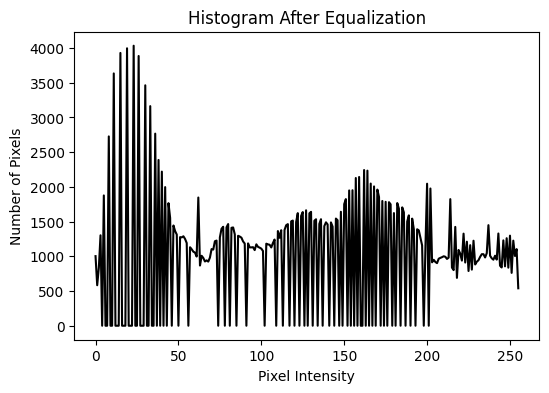

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image = cv2.imread('Picture1.jpg')


gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


color_hist = [cv2.calcHist([image], [i], None, [256], [0, 256]) for i in range(3)]  # BGR channels
gray_hist = cv2.calcHist([gray_image], [0], None, [256], [0, 256])


color_hist_normalized = [hist / hist.sum() for hist in color_hist]
gray_hist_normalized = gray_hist / gray_hist.sum()


plt.figure(figsize=(10, 6))


plt.subplot(2, 2, 1)
plt.plot(gray_hist, color='black')
plt.title('Grayscale Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Number of Pixels')

plt.subplot(2, 2, 2)
plt.plot(gray_hist_normalized, color='black')
plt.title('Normalized Grayscale Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Probability')

# Color Histograms for RGB channels
plt.subplot(2, 2, 3)
plt.plot(color_hist[0], color='blue', label='Blue')
plt.plot(color_hist[1], color='green', label='Green')
plt.plot(color_hist[2], color='red', label='Red')
plt.title('Color Image Histogram (BGR)')
plt.xlabel('Pixel Intensity')
plt.ylabel('Number of Pixels')
plt.legend()


plt.subplot(2, 2, 4)
plt.plot(color_hist_normalized[0], color='blue', label='Blue')
plt.plot(color_hist_normalized[1], color='green', label='Green')
plt.plot(color_hist_normalized[2], color='red', label='Red')
plt.title('Normalized Color Histogram (BGR)')
plt.xlabel('Pixel Intensity')
plt.ylabel('Probability')
plt.legend()

plt.tight_layout()
plt.show()

equalized_image = cv2.equalizeHist(gray_image)


equalized_hist = cv2.calcHist([equalized_image], [0], None, [256], [0, 256])



plt.figure(figsize=(6, 4))
plt.plot(equalized_hist, color='black')
plt.title('Histogram After Equalization')
plt.xlabel('Pixel Intensity')
plt.ylabel('Number of Pixels')
plt.show()



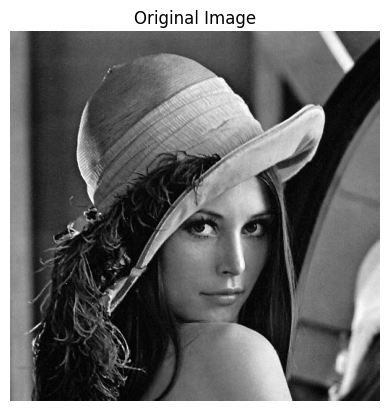

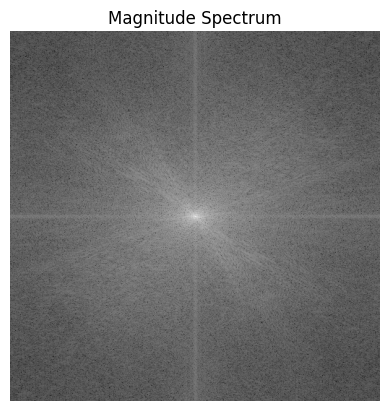

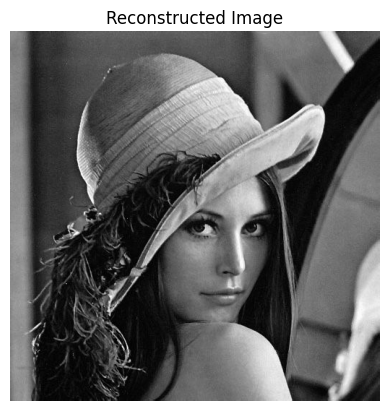

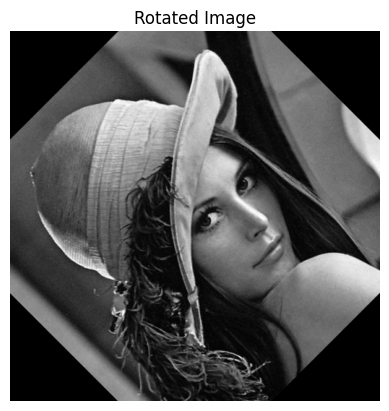

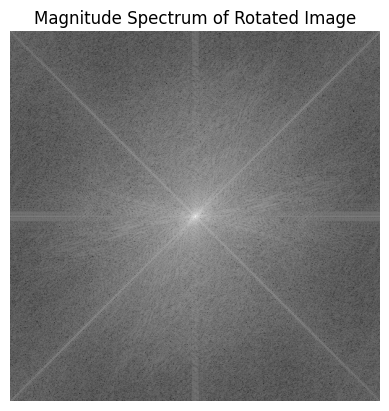

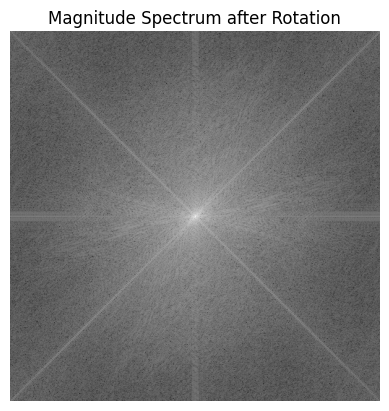

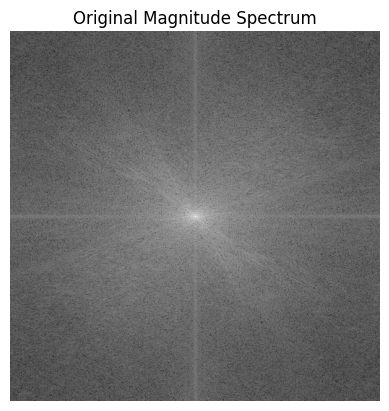

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
image = cv2.imread('Picture1.jpg', cv2.IMREAD_GRAYSCALE)
def show_image(image, title, cmap='gray'):
    plt.imshow(image, cmap=cmap)
    plt.title(title)
    plt.axis('off')
    plt.show()


f_transform = np.fft.fft2(image)
f_transform_shifted = np.fft.fftshift(f_transform)


magnitude_spectrum = np.abs(f_transform_shifted)
log_magnitude_spectrum = np.log(magnitude_spectrum + 1)


show_image(image, 'Original Image')
show_image(log_magnitude_spectrum, 'Magnitude Spectrum')

inverse_transform = np.fft.ifft2(np.fft.ifftshift(f_transform_shifted))
reconstructed_image = np.abs(inverse_transform)


show_image(reconstructed_image, 'Reconstructed Image')


angle = 45
rows, cols = image.shape
center = (cols // 2, rows // 2)
rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
rotated_image = cv2.warpAffine(image, rotation_matrix, (cols, rows))


f_rotated = np.fft.fft2(rotated_image)
f_rotated_shifted = np.fft.fftshift(f_rotated)


magnitude_spectrum_rotated = np.abs(f_rotated_shifted)
log_magnitude_spectrum_rotated = np.log(magnitude_spectrum_rotated + 1)


show_image(rotated_image, 'Rotated Image')
show_image(log_magnitude_spectrum_rotated, 'Magnitude Spectrum of Rotated Image')


show_image(log_magnitude_spectrum_rotated, 'Magnitude Spectrum after Rotation')
show_image(log_magnitude_spectrum, 'Original Magnitude Spectrum')